# Homework \#2:  Financial Modeling 

This notebook contains the second homework for this class, and is due on **Friday, February 19th, 2016 at 5:00 p.m.**.  Please make sure to get started early, and come by the instructors' office hours if you have any questions.  Office hours and locations can be found in the course syllabus.  **IMPORTANT:** While it's fine if you talk to other people in class about this homework - and in fact we encourage it! - you are responsible for creating the  solutions for this homework on your own, and each student must submit their own homework assignment.

**Some links that you may find helpful:**

* [Markdown tutorial](https://guides.github.com/features/mastering-markdown/)
* [The matplotlib website](http://matplotlib.org/)
* [The matplotlib figure gallery](http://matplotlib.org/gallery.html)  (this is particularly helpful for getting ideas!)
* [The Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* [The Python Control Flow tutorial](https://docs.python.org/3/tutorial/controlflow.html)

## Your name

# **** SOLUTIONS ****

----

## Some background: Investing basics.

Investing in the [stock market](https://en.wikipedia.org/wiki/Stock_market) can produce tremendous gains over time -- somewhere in the range of 8-10% annual returns on average (see [this link](http://static2.businessinsider.com/image/4cf4c902cadcbb8b740c0000/chart.gif) for a graph of this trend).  However, there is also tremendous volatility in the stock market (i.e., huge change in stock prices), with huge market swings over time.  This has happened several times over the past 40 years; see the [Google Stock Ticker for the S&P 500](https://goo.gl/NGfx4q) for the behavior of the stock market from 1975 through today.  The opportunity for huge financial return compared to a savings account is why many people invest much of their money for retirement in the stock exchange; however, the huge volatility and varied rate of return can profoundly affect returns, and in the worst case scenario can completely wipe out peoples' investments and keep them from retiring.

To help deal with this risk to their retirement savings, investors often put some of their money stocks and the rest in investments such as [bonds](https://en.wikipedia.org/wiki/Bond_(finance), which are safer than stocks - in other words, they have a much lower risk of going down in value than a stock would.  However, they also have much lower rates of return, meaning that their value is much less likely to go up substantially compared to stocks.  Depending on an individual investor's ability to tolerate uncertainty, they may choose different ratios of stocks to bonds, and stocks with varied amounts of risk - riskier stocks can both make more money and lose more money!

An additional concern when investing is [inflation](https://en.wikipedia.org/wiki/Inflation) - the tendency in the price of goods and services to go up over time.  This gradual increase in cost means that, over time, a dollar buys less and less.  In the United States over the past 50 years, inflation has hovered around 2% per year, although with significant swings (see [this chart](http://www.inflation.eu/inflation-rates/united-states/historic-inflation/cpi-inflation-united-states.aspx) for more information).  As a result, investments with rates of return lower than inflation are typically not a smart choice if you're trying to increase the amount of money available to you for retirement!

----

## Section 1 - A simple model for investment

In this section, we're going to make a simple model of the investment returns of an individual who is saving for retirement.  This model assumes that they put money into their investment portfolio at a constant rate, and that their stock portfolio grows at a constant rate.  Our assumptions are:

1. This investor starts saving for retirement at age 25, and plans to retire at age 65.
2. When they are 25 they have a salary of \$50,000/year and invest either 5% or 10% of their salary in their retirement account each year.  (We will call these the "low investment" and "high investment" options.)
3. Their salary goes up 3% a year until they retire at age 65, meaning that they contribute 3% more to their retirement account each year (in other words, the investor contributes a fixed percentage of their salary to their retirement account each year).
4. Inflation is a constant 2% a year, meaning that the effective purchasing power of their money goes down 2% each year compared to what you can buy today.
5. Their investments grow at a steady rate of 5%, 8%, or 11% per year (low, medium, or high growth rate)
6. When they retire, they will be able to spend 5% of their retirement account each year.

Using these assumptions, make a simple program to calculate (A) how much money will be in their retirement account every year from age 25 through 65 for all six possible options (low vs. high investment, and low/medium/high growth rate of the stock market); (B) how much inflation decreases the effective value of their investment each year; and, (C) how much money will be available to this person per year when they retire, in today's dollars (in other words, taking into account how inflation changes the purchasing power of their savings).  Show all of this information in three ways:

1. By printing out a table showing how investments and inflation grow over time.
2. With a plot that shows the size of their investment portfolio with their age, with line colors and types chosen so that one can tell the difference between the six options.
3. By creating a markdown cell explaining how much money is available to this person per year when they retire, in today's dollars, for each of the six scenarios.

### Some coding hints to get you started:

**Hint 1:** You can create an empty list by typing ```my_list = []```, and can append items to that list with ```my_list.append(val)```, where ```val``` is a number or string.

**Hint 2:** You can append an element to the end of a numpy array using the ```append``` method, though the syntax is different.  For example: ```my_array = np.append(my_array,13.0)``` will append the number 13 to the end of the numpy array ```my_array```.

**Hint 3:** You can create functions that take lists, arrays, and other types of variables as inputs, and also returns several variables (even of different types).  For example:

```
def example_func(my_list, my_array):
    my_list.append(2)
    my_array ** 2
    return my_list, my_array
```

will take a list and an array as an input, and return a new list and array that are modified versions of the originals. For example:

``` new_list, new_array = example_func(my_old_list, my_old_array)```

will return ```new_list``` and ```new_array```, which are modified versions of ```my_old_list``` and ```my_old_array```.  

**It is important to know** that if you modify a list or an array within a function, it will stay modified after you call the function even if you don't return it explicitly!  (So, in the example above, both ```my_old_list``` and ```my_old_array``` will be changed.)

If you want to actually copy the list or an array and only modify the copies, you have to use ```new_list = list(old_list)``` for lists, and ```new_array = np.copy(old_array)``` for numpy arrays.

In [1]:
# put your code for Section 1 here, adding additional cells right below this as necessary!
%matplotlib inline
import matplotlib.pyplot as plt

# function to make a simple calculation of the change in investment portfolio
# value over time
def investment_calculator_simple(salary, salary_increase, salary_contribution,
                                 inflation, investment_return, 
                                 starting_age, retirement_age):

    # empty lists for the age of the person and yearly investment portfolio value
    age = []
    investment_yearly = []
    
    # total money in investment portfolio
    investment_total = 0.0

    # total amount of inflation (compared to present year)
    inflation_total = 1.0
    
    # loop over year, calculating change in investment portfolio every year
    for year in range(starting_age, retirement_age+1):

        # add some fraction of your salary
        yearly_contribution = salary * salary_contribution

        # increase investments by some contribution, and increase by some yield
        investment_total = (investment_total + yearly_contribution)*investment_return

        # salary and inflation both go up
        salary *= salary_increase
        inflation_total *= inflation
        
        # print things out in a table, and use formatting to make it pretty
        print('{0:d} {1:.0f} {2:.0f} {3:.0f} {4:.3f}'.format(year,salary,yearly_contribution,
                                             investment_total,inflation_total))

        # keep track of what the investment amount is in a given year
        age.append(year)
        investment_yearly.append(investment_total)

    # return a ton of stuff so we can plot, etc.
    return age, investment_yearly, investment_total, inflation_total

# for each of the models (low vs. high investment rate, low/med/high market return)
# run the model.
age, inv_low_low, inv_low_low_total, inflation_total = investment_calculator_simple(50000.0, 1.03, 0.05,
                            1.02, 1.05, 25,65)

age, inv_high_low, inv_high_low_total, inflation_total = investment_calculator_simple(50000.0, 1.03, 0.10,
                            1.02, 1.05, 25,65)

age, inv_low_med, inv_low_med_total, inflation_total = investment_calculator_simple(50000.0, 1.03, 0.05,
                            1.02, 1.08, 25,65)

age, inv_high_med, inv_high_med_total, inflation_total = investment_calculator_simple(50000.0, 1.03, 0.10,
                            1.02, 1.08, 25,65)

age, inv_low_high, inv_low_high_total, inflation_total = investment_calculator_simple(50000.0, 1.03, 0.05,
                            1.02, 1.11, 25,65)

age, inv_high_high, inv_high_high_total, inflation_total = investment_calculator_simple(50000.0, 1.03, 0.10,
                            1.02, 1.11, 25,65)



25 51500 2500 2625 1.020
26 53045 2575 5460 1.040
27 54636 2652 8518 1.061
28 56275 2732 11812 1.082
29 57964 2814 15357 1.104
30 59703 2898 19168 1.126
31 61494 2985 23261 1.149
32 63339 3075 27652 1.172
33 65239 3167 32360 1.195
34 67196 3262 37403 1.219
35 69212 3360 42801 1.243
36 71288 3461 48575 1.268
37 73427 3564 54746 1.294
38 75629 3671 61339 1.319
39 77898 3781 68376 1.346
40 80235 3895 75885 1.373
41 82642 4012 83891 1.400
42 85122 4132 92424 1.428
43 87675 4256 101515 1.457
44 90306 4384 111193 1.486
45 93015 4515 121494 1.516
46 95805 4651 132452 1.546
47 98679 4790 144104 1.577
48 101640 4934 156490 1.608
49 104689 5082 169651 1.641
50 107830 5234 183629 1.673
51 111064 5391 198472 1.707
52 114396 5553 214226 1.741
53 117828 5720 230944 1.776
54 121363 5891 248677 1.811
55 125004 6068 267482 1.848
56 128754 6250 287419 1.885
57 132617 6438 308549 1.922
58 136595 6631 330939 1.961
59 140693 6830 354658 2.000
60 144914 7035 379777 2.040
61 149261 7246 406374 2.081
62 15373

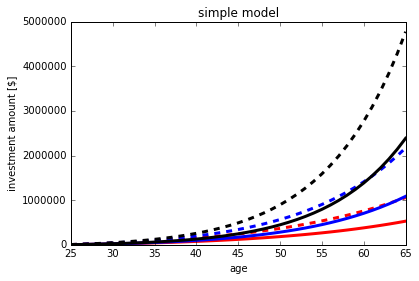

In [2]:
plt.plot(age,inv_low_low, 'r-',
         age,inv_high_low, 'r--',
         age,inv_low_med, 'b-',
         age,inv_high_med, 'b--',
         age,inv_low_high, 'k-',
         age,inv_high_high, 'k--',
         linewidth=3)
plt.title('simple model')
plt.xlabel('age')
plt.ylabel('investment amount [$]')

In [3]:
print("For low contribution/low return, available yearly amount is $",
      "{:.0f}".format(inv_low_low_total*0.05))
print("For high contribution/low return, available yearly amount is $",
      "{:.0f}".format(inv_high_low_total*0.05))

print("For low contribution/med return, available yearly amount is $",
      "{:.0f}".format(inv_low_med_total*0.05))
print("For high contribution/med return, available yearly amount is $",
      "{:.0f}".format(inv_high_med_total*0.05))

print("For low contribution/high return, available yearly amount is $",
      "{:.0f}".format(inv_low_high_total*0.05))
print("For high contribution/high return, available yearly amount is $",
      "{:.0f}".format(inv_high_high_total*0.05))

print("")

print("$1 in 2016 is equal to $","{:.3f}".format(1.0/inflation_total),"in 2056")

print("")

print("The effective value of each one (in 2016 dollars) is:")

print("")

print("low contribution/low return, $",
      "{:.0f}".format(inv_low_low_total*0.05/inflation_total))
print("high contribution/low return, $",
      "{:.0f}".format(inv_high_low_total*0.05/inflation_total))

print("low contribution/med return, $",
      "{:.0f}".format(inv_low_med_total*0.05/inflation_total))
print("high contribution/med return, $",
      "{:.0f}".format(inv_high_med_total*0.05/inflation_total))

print("low contribution/high return, $",
      "{:.0f}".format(inv_low_high_total*0.05/inflation_total))
print("high contribution/high return, $",
      "{:.0f}".format(inv_high_high_total*0.05/inflation_total))

For low contribution/low return, available yearly amount is $ 26461
For high contribution/low return, available yearly amount is $ 52921
For low contribution/med return, available yearly amount is $ 54277
For high contribution/med return, available yearly amount is $ 108554
For low contribution/high return, available yearly amount is $ 119310
For high contribution/high return, available yearly amount is $ 238619

$1 in 2016 is equal to $ 0.444 in 2056

The effective value of each one (in 2016 dollars) is:

low contribution/low return, $ 11749
high contribution/low return, $ 23498
low contribution/med return, $ 24100
high contribution/med return, $ 48199
low contribution/high return, $ 52975
high contribution/high return, $ 105949


**Some questions about this model:**

1. How big of a difference in money available at retirement does a relatively small difference in return rate (5% vs. 8% vs 11%) make?  What about their savings rate (5% vs. 10%)?
2. If you change the age that the investor *starts* investing, how does that affect their available income when they retire at age 65?  (Try the ages of 20, 25, 30, and 35 and compare the differences in a table for a couple of the scenarios -- you can use the [Mastering Markdown](https://guides.github.com/features/mastering-markdown/) tutorial to see how to make tables.)
3. More generally, what can you conclude about investing for retirement based on the model you've created here?

**ANSWERS**

1. Changing the rate of return massively changes the amount of money available at the end. Compared to 5% rate of return, 8% return basically doubles your available cash and 11% increase it by a factor of 4.5.  Increasing the contribution by a factor of two doubles the amount available, regardless of rate of return.
2. The amount of money available grows exponentially, so starting to invest earlier vs. later profoundly affects the amount available.  For the high-investment, high return option, this turns out to make a huge difference.  See the table at the end of this cell.
3. Start retiring early and hope for a good return on investment.  Being overly conservative makes a huge difference.

beginning age | yearly income at retirement (inflation-adjusted)|
--------------|--------------------------------------------------
20 | \$164,165 
25 | \$105,949 
30 | \$67,882 
35 | \$43,013 
40 | \$26,788 
45 | \$16,223 


## Section 2 - A slightly more complex model calculating investment returns

As you saw in the links above, the return from the [stock market](https://goo.gl/NGfx4q) and the [inflation rate](http://www.inflation.eu/inflation-rates/united-states/historic-inflation/cpi-inflation-united-states.aspx) both change significantly from year to year, as do the raises that people tend to get.  This can result in substantial differences in investment return compared to the simple model in the previous section.

You're now going to improve upon your previous model by introducing one element of randomness into the modeling process: namely, the rate of return of their investments.  We'll keep all of the assumptions from the previous section **except \#5**.  In this version of the model, **the investment portfolio now fluctuates in growth every year,** and the amount depends on the risk the investor chooses to take.  The low growth rate/low risk version fluctuates between 2%-8%; the medium growth rate/medium risk version fluctuates between 3% and 13% each year; and the high growth rate/high risk version fluctuates between 1% and 21% each year.   (Assume that the return in any given year is totally random, and varies linearly between the maximum and minimum number give.)  The investor's yearly raises and inflation rate will stay constant.

Given that there is quite a bit of randomness, it's important to run each of the six investment scenarios (low vs. high investment fraction, low/medium/high growth/risk rate) many times to get a sense of the range of possible outcomes.  We're going to explore this in several ways:

* First, calculate the growth of savings for one possible outcome of each of the six scenarios and put them all together on a single plot.  
* Second, consider the two extreme scenarios - the low investment/low risk rate scenario and the high investment/high risk rate scenario.  Run each of these scenarios at least 100 times and create a list or array that contains only one piece of information from each run - the amount of money is available to the investor to spend per year when they retire, in today's dollars - and show a histogram of those amounts.  (You can either put both scenarios on one histogram with different colors, or use two separate ones.)

In [4]:
# put your code for section 2 here, adding additional cells as necessary!
import random

def investment_calculator_2(salary, salary_increase, salary_contribution,
                                 inflation, investment_return_low, investment_return_high, 
                                 starting_age, retirement_age):
    age = []
    investment_yearly = []
    investment_total = 0.0
    inflation_total = 1.0
    
    for year in range(starting_age, retirement_age+1):
        yearly_contribution = salary * salary_contribution

        investment_total = (investment_total + yearly_contribution)*random.uniform(investment_return_low, 
                                                                                   investment_return_high)
        salary *= salary_increase
        inflation_total *= inflation
        #print('{0:d} {1:.0f} {2:.0f} {3:.0f} {4:.3f}'.format(year,salary,yearly_contribution,
        #                                     investment_total,inflation_total))

        age.append(year)
        investment_yearly.append(investment_total)

    return age, investment_yearly, investment_total, inflation_total


age, inv_low_low, inv_low_low_total, inflation_total = investment_calculator_2(50000.0, 1.03, 0.05,
                            1.02, 1.02, 1.08, 25,65)

age, inv_high_low, inv_high_low_total, inflation_total = investment_calculator_2(50000.0, 1.03, 0.10,
                            1.02, 1.02, 1.08, 25,65)

age, inv_low_med, inv_low_med_total, inflation_total = investment_calculator_2(50000.0, 1.03, 0.05,
                            1.02, 1.03, 1.13, 25,65)

age, inv_high_med, inv_high_med_total, inflation_total = investment_calculator_2(50000.0, 1.03, 0.10,
                            1.02, 1.03, 1.13, 25,65)

age, inv_low_high, inv_low_high_total, inflation_total = investment_calculator_2(50000.0, 1.03, 0.05,
                            1.02, 1.01, 1.21, 25,65)

age, inv_high_high, inv_high_high_total, inflation_total = investment_calculator_2(50000.0, 1.03, 0.10,
                            1.02, 1.01, 1.21, 25,65)


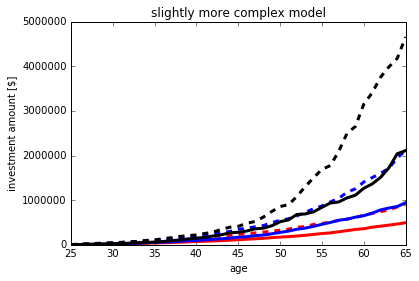

In [5]:
plt.plot(age,inv_low_low, 'r-',
         age,inv_high_low, 'r--',
         age,inv_low_med, 'b-',
         age,inv_high_med, 'b--',
         age,inv_low_high, 'k-',
         age,inv_high_high, 'k--',
         linewidth=3)
plt.title("slightly more complex model")
plt.xlabel('age')
plt.ylabel('investment amount [$]')

In [6]:
import numpy as np

number_of_trials = 10000

low_low_end_vals = []
high_high_end_vals = []

for i in range(number_of_trials):
    age, inv_low_low, inv_low_low_total, inflation_total = investment_calculator_2(50000.0, 1.03, 0.05,
                            1.02, 1.02, 1.08, 25,65)

    low_low_end_vals.append(inv_low_low_total*0.05)

    age, inv_high_high, inv_high_high_total, inflation_total = investment_calculator_2(50000.0, 1.03, 0.10,
                            1.02, 1.01, 1.21, 25,65)
    
    high_high_end_vals.append(inv_high_high_total*0.05)
    

    


the average return is $ 26482.34 per year for the low contribution/low return scenario
with a standard deviation of $ 1801.72


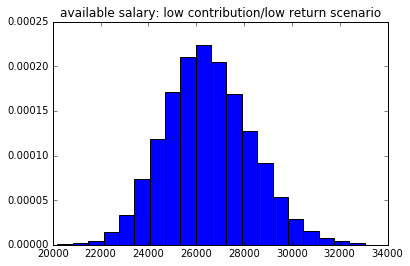

In [7]:
plt.hist(low_low_end_vals,bins=20,normed=True)
plt.title("available salary: low contribution/low return scenario")

low_low_end_vals = np.array(low_low_end_vals)
meanval = low_low_end_vals.mean()
stddev = low_low_end_vals.std()

print("the average return is $",'{:.2f}'.format(meanval),
      "per year for the low contribution/low return scenario")
print("with a standard deviation of $",'{:.2f}'.format(stddev))

the average return is $ 238309.19 per year for the high contribution/high return scenario
with a standard deviation of $ 62526.37


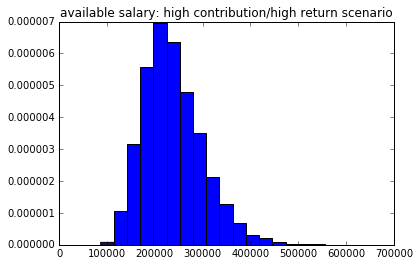

In [8]:
plt.hist(high_high_end_vals,bins=20,normed=True)
plt.title("available salary: high contribution/high return scenario")


high_high_end_vals = np.array(high_high_end_vals)
meanval = high_high_end_vals.mean()
stddev = high_high_end_vals.std()

print("the average return is $",'{:.2f}'.format(meanval),
      "per year for the high contribution/high return scenario")
print("with a standard deviation of $",'{:.2f}'.format(stddev))

**Question:** How the outcomes for this model different, both qualitatively and quantitatively, than the model in section 1?


The mean values for the two models I show the distribution for (the low investment/low yield model and high investment/high yield model) are pretty much the same as in the simple model; however, there is a pretty substantial variation in outcome now for each of the models, with the riskier model having a substantially larger range of possible outcomes. In other words, depending on market fluctuations, the final amount available to spend varies tremendously!

## Section 3 - An even better model for calculating investment returns

In this section, we're going to build upon what you did in Section 2 and introduce some additional elements of randomness into our model to make it more realistic and to see how that affects the outcomes.  We will keep assumptions \#1, 2, and 6 from the first section the same, but we'll change the others as follows:

* The investor's salary now goes up by some random amount between 1-5% each year (varying linearly between 1-5%).
* Inflation is between 0% and 4% in any given year (varying linearly between 0-4%)
* Their investment portfolio fluctuates in growth every year as described in Section 2.

Given that there is quite a bit of randomness, it's important to run each of the six investment scenarios (low vs. high investment fraction, low/medium/high growth/risk rate) many times to get a sense of the range of possible outcomes.  We're going to explore this in several ways:

* First, calculate the growth of savings for one possible outcome of each of the six scenarios and put them all together on a single plot.  In a markdown cell below, explain how this is different than the plot you made in the previous section!
* Second, consider the two extreme scenarios - the low investment/low risk rate scenario and the high investment/high risk rate scenario.  Run each of these scenarios at least 100 times and create a list or array that contains only one piece of information from each run - the amount of money is available to the investor to spend per year when they retire, in today's dollars - and show a histogram of those amounts.  (You can either put both scenarios on one histogram with different colors, or use two separate ones.)
* *Optionally* do the same as in the previous section, but for all of the six investment scenarios.  


In [9]:
# put your code for section 3 here, adding additional cells as necessary!

def investment_calculator_3(salary, salary_increase_low, salary_increase_high, salary_contribution,
                                 inflation_low, inflation_high,
                                 investment_return_low, investment_return_high, 
                                 starting_age, retirement_age):
    
    age = []
    investment_yearly = []
    investment_total = 0.0
    inflation_total = 1.0
    
    for year in range(starting_age, retirement_age+1):
        yearly_contribution = salary * salary_contribution

        investment_total = (investment_total + yearly_contribution)*random.uniform(investment_return_low, 
                                                                                   investment_return_high)
        salary *= random.uniform(salary_increase_low, salary_increase_high)
        inflation_total *= random.uniform(inflation_low, inflation_high)
        #print('{0:d} {1:.0f} {2:.0f} {3:.0f} {4:.3f}'.format(year,salary,yearly_contribution,
        #                                     investment_total,inflation_total))

        age.append(year)
        investment_yearly.append(investment_total)

    return age, investment_yearly, investment_total, inflation_total


age, inv_low_low, inv_low_low_total, inflation_total = investment_calculator_3(50000.0, 1.01, 1.05, 0.05,
                            1.00, 1.04, 1.02, 1.08, 25,65)

age, inv_high_low, inv_high_low_total, inflation_total = investment_calculator_3(50000.0, 1.01, 1.05, 0.10,
                            1.00, 1.04, 1.02, 1.08, 25,65)

age, inv_low_med, inv_low_med_total, inflation_total = investment_calculator_3(50000.0, 1.01, 1.05, 0.05,
                            1.00, 1.04, 1.03, 1.13, 25,65)

age, inv_high_med, inv_high_med_total, inflation_total = investment_calculator_3(50000.0, 1.01, 1.05, 0.10,
                            1.00, 1.04, 1.03, 1.13, 25,65)

age, inv_low_high, inv_low_high_total, inflation_total = investment_calculator_3(50000.0, 1.01, 1.05, 0.05,
                            1.00, 1.04, 1.01, 1.21, 25,65)

age, inv_high_high, inv_high_high_total, inflation_total = investment_calculator_3(50000.0, 1.01, 1.05, 0.10,
                            1.00, 1.04, 1.01, 1.21, 25,65)


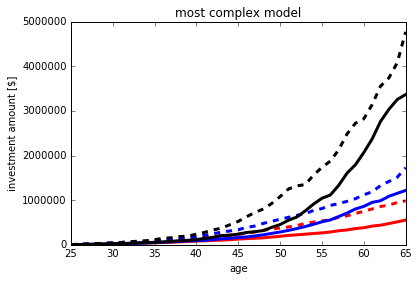

In [10]:
plt.plot(age,inv_low_low, 'r-',
         age,inv_high_low, 'r--',
         age,inv_low_med, 'b-',
         age,inv_high_med, 'b--',
         age,inv_low_high, 'k-',
         age,inv_high_high, 'k--',
         linewidth=3)
plt.title("most complex model")
plt.xlabel('age')
plt.ylabel('investment amount [$]')

In [11]:
number_of_trials = 1000

low_low_end_vals = []
high_high_end_vals = []
low_low_end_vals_infl_adj = []
high_high_end_vals_infl_adj = []

for i in range(number_of_trials):
    age, inv_low_low, inv_low_low_total, inflation_total = investment_calculator_3(50000.0, 1.01, 1.05, 0.05,
                            1.00, 1.04, 1.02, 1.08, 25,65)

    low_low_end_vals.append(inv_low_low_total*0.05)
    low_low_end_vals_infl_adj.append(inv_low_low_total*0.05/inflation_total)

    age, inv_high_high, inv_high_high_total, inflation_total = investment_calculator_3(50000.0, 1.01, 1.05, 0.10,
                            1.00, 1.04, 1.01, 1.21, 25,65)
    
    high_high_end_vals.append(inv_high_high_total*0.05)
    high_high_end_vals_infl_adj.append(inv_high_high_total*0.05/inflation_total)


the average return is $ 26313.88 per year for the low contribution/low return scenario
with a standard deviation of $ 2011.68


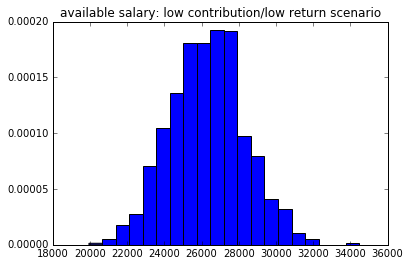

In [12]:
# IGNORING INFLATION 

plt.hist(low_low_end_vals,bins=20,normed=True)
plt.title("available salary: low contribution/low return scenario")

low_low_end_vals = np.array(low_low_end_vals)
meanval = low_low_end_vals.mean()
stddev = low_low_end_vals.std()

print("the average return is $",'{:.2f}'.format(meanval),
      "per year for the low contribution/low return scenario")
print("with a standard deviation of $",'{:.2f}'.format(stddev))

the average return is $ 11710.53 per year for the low contribution/low return scenario
with a standard deviation of $ 1222.96


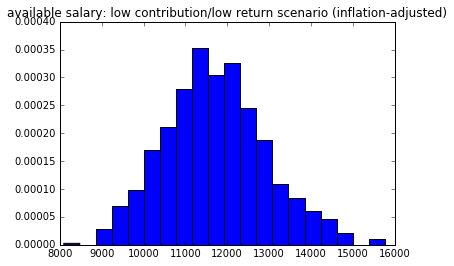

In [13]:
# TAKING INTO ACCOUNT INFLATION 

plt.hist(low_low_end_vals_infl_adj,bins=20,normed=True)
plt.title("available salary: low contribution/low return scenario (inflation-adjusted)")

low_low_end_vals_infl_adj = np.array(low_low_end_vals_infl_adj)
meanval = low_low_end_vals_infl_adj.mean()
stddev = low_low_end_vals_infl_adj.std()

print("the average return is $",'{:.2f}'.format(meanval),
      "per year for the low contribution/low return scenario")
print("with a standard deviation of $",'{:.2f}'.format(stddev))

the average return is $ 240867.42 per year for the high contribution/high return scenario
with a standard deviation of $ 67062.86


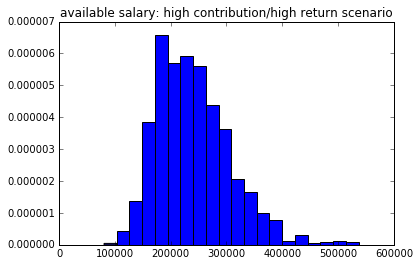

In [14]:
# IGNORING INFLATION 

plt.hist(high_high_end_vals,bins=20,normed=True)
plt.title("available salary: high contribution/high return scenario")

high_high_end_vals = np.array(high_high_end_vals)
meanval = high_high_end_vals.mean()
stddev = high_high_end_vals.std()

print("the average return is $",'{:.2f}'.format(meanval),
      "per year for the high contribution/high return scenario")
print("with a standard deviation of $",'{:.2f}'.format(stddev))

the average return is $ 107699.59 per year for the high contribution/high return scenario
with a standard deviation of $ 31503.26


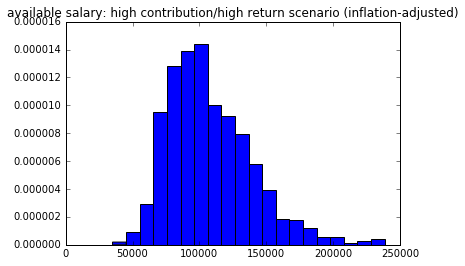

In [15]:
# TAKING INTO ACCOUNT INFLATION 

plt.hist(high_high_end_vals_infl_adj,bins=20,normed=True)
plt.title("available salary: high contribution/high return scenario (inflation-adjusted)")

high_high_end_vals_infl_adj = np.array(high_high_end_vals_infl_adj)
meanval = high_high_end_vals_infl_adj.mean()
stddev = high_high_end_vals_infl_adj.std()

print("the average return is $",'{:.2f}'.format(meanval),
      "per year for the high contribution/high return scenario")
print("with a standard deviation of $",'{:.2f}'.format(stddev))

**Question:**  Think about the information that you get from the model in this section compared to both the original model in Section 1 and the somewhat more advanced model in Section 2.  What parts of the models agree and disagree?  What additional information do you get from this model?  How does it differ from Section 2's model?


This model gives a large spread of answers compared to the original model, and answers that are comparable to section 2 (though the latter is true only for the distribution at the end; taking into account variable contributions and variable inflation can mean that the amount that the investment portfolio can change each year is very large.  We get a bit of additional information compared to section 2, in that it has a different spread of final values.  It isn't too different from section 2's model, though.  This might  be because all of the randomness is uniform (i.e., values only change linearly and are random from year to year)

**Question:** Also, think about other information that you can get from this model.  What can it tell you about how an investment portfolio might behave?  And, if you were an investment advisor, how would you use these models to give your clients advice?


This model provides some sense of what the possible variation in investment yields are over time - in other words, how much randomness there is in a year-over-year sense, and how much the total variation in final outcome there might be.  I would show the outcomes of this type of model to my clients to explain what the difference of possible outcomes is between the various investment strategies and investment contributions, and explain that the high risk/high reward option will yield more money on average but with a wider range of possible gains.

**Question:** Looking at the graphs of inflation and the stock market, and thinking about peoples' careers and savings habits, how might you improve your model to more accurately reflect the possible outcomes for an investor? 

There are a variety of ways that this model could be improved:

* doesn't take into account large changes in income due to job changes, job loss, etc.
* doesn't take into account market booms and busts (regresses to the mean very quickly, rather than taking time)
* yields are only positive - should take into account the possibility of a market crash (i.e., negative yield)
* doesn't take into account that people might save lots of money early on and less later (due to having kids, for example - kids are expensive!)
* doesn't take into account that people might save very little money early in their career but put lots more money in later in their career.
* Linear (uniform) distributions in the various values probably aren't the most accurate; some other distribution in values might be more realistic.

----

## Section 3: Feedback (required!)

## How long did you spend on the homework?

Write your answer here

## What questions do you have after this assignment?

Write your answer here

----

# Congratulations, you're done!

## How to submit this assignment

Log into the course Desire2Learn website (d2l.msu.edu) and go to the "Homework assignments" folder.  There will be a dropbox labeled "Homework 2".  Upload this notebook there. 